In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats
import seaborn as sns

# Dividend Discount Model

![timeframe](./assets/time_frame.png)

In [38]:
def create_div_table(file_name):
  df = pd.read_csv(f"./data/{file_name}.csv", index_col=0)

  df.index = pd.to_datetime(df.index)

  year_group = df.groupby([df.index.year])
  year_group.sum().index.name = "Year"

  div_table = year_group.sum()
  div_table["Growth"] = div_table["Dividends"].pct_change()

  return div_table


### Dividend Discount Model:

![DDM](./assets/ddm.png)

In [39]:
def get_dividend_model(div_df, cur_sp):
  # This is just because
  avg_growth = div_df["Growth"].mean()

  init_div = div_df.iloc[0]["Dividends"]
  cur_div = div_df.iloc[-1]["Dividends"]

  n = len(div_df["Dividends"]) - 1

  growth = (cur_div/init_div)**(1/n) - 1
  d1 = cur_div * (1+growth)

  ke = (d1 / cur_sp) + growth

  next_year = pd.DataFrame({
    "Dividends": [d1],
    "Growth": [growth]
  }, index=(div_df.iloc[-1].name + 1,))

  updated_div = pd.concat([div_df, next_year])
  updated_div.index.name = "Year"
  # print("Dividend Table")
  # print(updated_div)

  # yield_ke = pd.Series([ke], ["Yield (ke)"])
  expected_return = f"Expected Return (ke): {round(ke*100, 2)}%"
  # print(yield_ke)

  # future_div = pd.Series([d1], ["Predicted Dividend"])
  future_div = f"Predicted Dividend: Rs. {round(d1, 2)}"
  # print(future_div)

  return [updated_div, expected_return, future_div]


## Company: Infosys

![Stock Price](./assets/infy_mp.png)

In [40]:
infy_cur_price = 1863.3
infy_div = create_div_table("div_infy")

infy_div_table, infy_ke, infy_future_div = get_dividend_model(infy_div, infy_cur_price)


In [41]:
infy_div_table

,Dividends,Growth
Year,,
2017,13.875000,NaN
2018,12.000000,-0.135135
2019,30.500000,1.541667
2020,21.500000,-0.295082
2021,30.000000,0.395349
2022,36.378377,0.212613


In [42]:
print(infy_ke)

Expected Return (ke): 23.21%


In [43]:
print(infy_future_div)

Predicted Dividend: Rs. 36.38


## Company: TCS

![Stock Price](./assets/tcs_mp.png)

In [44]:
tcs_cur_price = 3814.8
tcs_div = create_div_table("div_tcs")

tcs_div_table, tcs_ke, tcs_future_div = get_dividend_model(tcs_div, tcs_cur_price)


In [45]:
tcs_div_table

,Dividends,Growth
Year,,
2017,24.000000,NaN
2018,26.000000,0.083333
2019,67.000000,1.576923
2020,40.000000,-0.402985
2021,35.000000,-0.125000
2022,38.462034,0.098915


In [46]:
print(tcs_ke)

Expected Return (ke): 10.9%


In [47]:
print(tcs_future_div)

Predicted Dividend: Rs. 38.46


## Company: Mindtree

![Stock Price](./assets/mindtree_mp.png)

In [48]:
mt_cur_price = 4389.5
mt_div = create_div_table("div_mindtree")

mt_div_table, mt_ke, mt_future_div = get_dividend_model(mt_div, mt_cur_price)


In [49]:
mt_div_table

,Dividends,Growth
Year,,
2017,9.00000,NaN
2018,13.00000,0.444444
2019,49.00000,2.769231
2020,17.50000,-0.642857
2021,27.50000,0.571429
2022,36.35844,0.322125


In [50]:
print(mt_ke)

Expected Return (ke): 33.04%


In [51]:
print(mt_future_div)

Predicted Dividend: Rs. 36.36


# Capital Asset Pricing Model

![timeframe](./assets/time_frame.png)

In [52]:
def get_closing_series(file_name, col_name):
  df = pd.read_csv(f"./data/{file_name}.csv", index_col=0)
  df.index = pd.to_datetime(df.index)
  
  try:
    close_prices = df.loc[:, "Adj Close"]
  except:
    close_prices = df.loc[:, "Price"]

  close_prices.name = col_name
  return close_prices


In [53]:
nifty_50 = get_closing_series("nifty_50", "nifty")
nifty_it = get_closing_series("nifty_it", "nifty")
risk_free = get_closing_series("risk_free_return", "bond_price")

In [54]:
infy = get_closing_series("sp_infy", "stock_price")
tcs = get_closing_series("sp_tcs", "stock_price")
mindtree = get_closing_series("sp_mindtree", "stock_price")

infy_df = pd.concat([infy, nifty_50, risk_free], axis=1)
infy_df = infy_df.dropna()

tcs_df = pd.concat([tcs, nifty_50, risk_free], axis=1)
tcs_df = tcs_df.dropna()

mindtree_df = pd.concat([mindtree, nifty_it, risk_free], axis=1)
mindtree_df = mindtree_df.dropna()

check_na = infy_df.isna().sum()

for df in [infy_df, tcs_df, mindtree_df]:
  check_na = df.isna().sum().sum()
  if check_na:
    print(check_na)


In [55]:
def cagr(final, initial, n):
  return (final/initial)**(1/n) - 1

In [56]:
df["bond_return"] = df["bond_price"].pct_change()
# rf = df["bond_return"].sum()

# TODO: Doubt, ask ma'am!
# real_n = (len(df) - 1) / (5*4*12)
# # rf_alt = cagr(df["bond_return"][-1], df["bond_return"][1], real_n)
# rf_alt = cagr(0.00124, -0.00128, 5)
# print("rf:", rf)
# print(df["bond_return"][-1], df["bond_return"][1], real_n)
# print("rf_alt:", rf_alt)

# The India 10 Years Government Bond has a 7.119% yield.
annual_bond_return = 0.07119
annual_inflation = 0.0397

rf = ((1+annual_bond_return)/(1+annual_inflation)) - 1
print(rf)

def calc_expected_return(df, rf):

  df["stock_return"] = df["stock_price"].pct_change()
  df["nifty_return"] = df["nifty"].pct_change()

  count = len(df) - 1
  market_days_pa = 5 * 4 * 12
  n = count / market_days_pa

  market_cagr = cagr(df.iloc[-1]["nifty"], df.iloc[1]["nifty"], n)
  print(f"Market CAGR: {round(market_cagr * 100, 2)}%")

  market_return = df["nifty_return"][1:].values
  stock_return = df["stock_return"][1:].values

  (beta, alpha) = stats.linregress(market_return, stock_return)[0:2]
  print(f"beta:{round(beta, 2)}")

  # CAPM
  ke = rf + beta * (market_cagr - rf)
  print(f"ke: {round(ke * 100, 2)}%")

  capm_model = pd.DataFrame({"Values": [market_cagr, beta, ke]}, index=["Rm (%)", "beta", "ke (%)"])
  capm_model.index.names = ["Particulars"]
  return capm_model


0.03028758295662204


In [57]:
def plot_graph(df, stock_name):
  market_return = df["nifty_return"][1:].values
  stock_return = df["stock_return"][1:].values

  sns.regplot(x=market_return, y=stock_return)
  plt.xlabel("Market Returns")
  plt.ylabel(f"{stock_name} Returns")
  plt.title(f"{stock_name} Returns vs Market Returns")

  # plt.xticks(np.arange(min(market_return), max(market_return), 0.05))

  plt.tight_layout()
  plt.show()


## Company: Infosys

Market CAGR: 15.94%
beta:0.75
ke: 12.72%


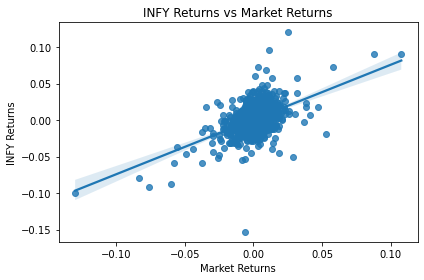

,Values
Particulars,
Rm (%),0.159394
beta,0.750737
ke (%),0.127212


In [58]:
infy_capm_df = calc_expected_return(infy_df, rf)
plot_graph(infy_df, "INFY")
infy_capm_df


## Analysis INFY:

Infosys is a defensive stock, as the beta is 0.75, meaning that if Nifty 50 increases by 1%, then INFY increases by 0.75%

The required rate of return is 12.77% per annum which is lower than the market return.

## Company: TCS

Market CAGR: 15.94%
beta:0.63
ke: 11.15%


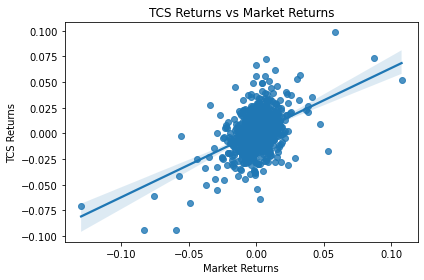

,Values
Particulars,
Rm (%),0.159394
beta,0.629207
ke (%),0.111522


In [59]:
tcs_capm_df = calc_expected_return(tcs_df, rf)
plot_graph(tcs_df, "TCS")
tcs_capm_df


## Analysis TCS:

Infosys is a defensive stock, as the beta is 0.63, meaning that if Nifty 50 increases by 1%, then TCS increases by 0.63%

The required rate of return is 11.23% per annum which is lower than the market return.

## Company: Mindtree

Market CAGR: 29.85%
beta:1.01
ke: 30.24%


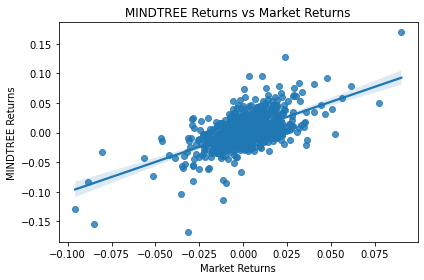

,Values
Particulars,
Rm (%),0.298454
beta,1.014776
ke (%),0.302416


In [60]:
mt_capm_df = calc_expected_return(mindtree_df, rf)
plot_graph(mindtree_df, "MINDTREE")
mt_capm_df


## Analysis Mindtree:

Mintree is a slightly risky stock, as the beta is 1.02, meaning that if Nifty IT increases by 1%, then Mindtree increases by 1.02%

The required rate of return is 30.24% per annum which is lower than the market return.

# Analyzing Financial Statements

In [61]:
def read_fin_files(ticker):
  income_st = pd.read_csv(f"./fin_data/{ticker}_IS.csv", index_col=0)
  balance_sh = pd.read_csv(f"./fin_data/{ticker}_BS.csv", index_col=0)

  return (income_st, balance_sh)

In [62]:
def create_dividend_policy_table(fin_statements, ticker):
  """fin_statements: (income_statement, balance_sheet)
  
  Returns a df: Dividend Policy
  """
  div_pol_rows = []

  div_pol_rows.append(fin_statements[0].loc["Basic EPS (Rs.)"])
  div_pol_rows.append(fin_statements[0].loc["Profit/Loss For The Period"])
  div_pol_rows.append(fin_statements[1].loc["Total Shareholders Funds"])

  div_policy = pd.DataFrame(div_pol_rows)

  div_policy.reset_index(drop=False, inplace=True)
  div_policy.set_index("index", inplace=True)
  div_policy.index.names = ["Particulars"]

  # TODO: Add if statements.

  if ticker == "INFY.NS":
    divi = infy_div_table[2:-1]
  elif ticker == "TCS.NS":
    divi = tcs_div_table[2:-1]
  elif ticker == "MINDTREE.NS":
    divi = mt_div_table[2:-1]

  divis = divi["Dividends"].sort_index(ascending=False)
  dps_ser = pd.DataFrame(divis).transpose()
  dps_ser.columns = [2021, 2020, 2019]

  div_policy.columns = [2021, 2020, 2019]
  div_policy = pd.concat([div_policy, dps_ser], axis=0)
  div_policy.index.names = ["Particulars"]

  # ["Dividends"] == "DPS"
  div_policy.loc["Dividend Payout Ratio"] = div_policy.loc["Dividends"] / div_policy.loc["Basic EPS (Rs.)"]

  # Retention Ratio (b)
  div_policy.loc["Retention Ratio"] = 1 - div_policy.loc["Dividend Payout Ratio"]

  # Return on Equity
  div_policy.loc["RoE (%)"] = div_policy.loc["Profit/Loss For The Period"] / div_policy.loc["Total Shareholders Funds"]

  div_policy.loc["Growth Rate (%)"] = div_policy.loc["Retention Ratio"] * div_policy.loc["RoE (%)"]

  return div_policy

In [63]:
def create_leverage_ratio_table(fin_statements):
  """fin_statements: (income_statement, balance_sheet)
  
  Returns a df: Leverage Ratio Table
  """
  rows = []

  rows.append(fin_statements[0].loc["Total Operating Revenues"])
  rows.append(fin_statements[0].loc["Operating And Direct Expenses"])
  rows.append(fin_statements[0].loc["Employee Benefit Expenses"])
  rows.append(fin_statements[0].loc["Revenue From Operations [Gross]"])

  leverage_ratio_df = pd.DataFrame(rows)
  leverage_ratio_df.index.names = ["Particulars"]

  leverage_ratio_df.loc["Variable Cost"] = leverage_ratio_df.loc["Operating And Direct Expenses"] + 0.5 * leverage_ratio_df.loc["Employee Benefit Expenses"]

  leverage_ratio_df.loc["Contribution"] = leverage_ratio_df.loc["Revenue From Operations [Gross]"] - leverage_ratio_df.loc["Variable Cost"]

  leverage_ratio_df.loc["EBIT"] = fin_statements[0].loc["Profit/Loss Before Tax"] + fin_statements[0].loc["Finance Costs"]

  leverage_ratio_df.loc["Operating Leverage"] = leverage_ratio_df.loc["Contribution"] / leverage_ratio_df.loc["EBIT"]

  leverage_ratio_df.loc["Finance Cost"] = fin_statements[0].loc["Finance Costs"]
  
  leverage_ratio_df.loc["Depreciation And Amortisation Expenses"] = fin_statements[0].loc["Depreciation And Amortisation Expenses"]

  leverage_ratio_df.loc["Financing Leverage Ratio"] = leverage_ratio_df.loc["EBIT"] / fin_statements[0].loc["Profit/Loss Before Tax"]

  leverage_ratio_df.loc["Interest Coverage Ratio"] = leverage_ratio_df.loc["EBIT"] / leverage_ratio_df.loc["Finance Cost"]
  
  return leverage_ratio_df

In [64]:
def create_debt_equity_table(fin_statements):
  """fin_statements: (income_statement, balance_sheet)
  
  Returns a df: Debt Equity Table
  """
  rows = []

  rows.append(fin_statements[1].loc["Total Non-Current Liabilities"])
  rows.append(fin_statements[1].loc["Total Current Liabilities"])

  debt_equity_df = pd.DataFrame(rows)
  debt_equity_df.index.names = ["Particulars"]

  debt_equity_df.loc["Total Borrowings"] = debt_equity_df.iloc[0] + debt_equity_df.iloc[1]

  debt_equity_df.loc["Total Shareholders Funds"] = fin_statements[1].loc["Total Shareholders Funds"]

  debt_equity_df.loc["Debt / Equity Ratio"] = debt_equity_df.loc["Total Borrowings"] / debt_equity_df.loc["Total Shareholders Funds"]

  return debt_equity_df

In [65]:
def create_misc_table(fin_statements, ticker, div_policy, debt_equity_table):
  """fin_statements: (income_statement, balance_sheet)
  
  Returns a df: Misc. Table
  """

  if ticker == "INFY.NS":
    ke = infy_capm_df.iloc[2]["Values"]
    stock_price = infy_cur_price
    d1 = infy_div_table.loc[2022][0]
  elif ticker == "TCS.NS":
    ke = tcs_capm_df.iloc[2]["Values"]
    stock_price = tcs_cur_price
    d1 = tcs_div_table.loc[2022][0]
  elif ticker == "MINDTREE.NS":
    ke = mt_capm_df.iloc[2]["Values"]
    stock_price = mt_cur_price
    d1 = mt_div_table.loc[2022][0]

  no_shares = fin_statements[1].loc["No. of Shares"][0]
  fin_costs = fin_statements[0].loc["Finance Costs"][0]
  total_borrowings = debt_equity_table.loc["Total Borrowings"][0]
  # Short formula
  kd = fin_costs / total_borrowings

  ebt = fin_statements[0].loc["Profit/Loss Before Tax"][0]
  tax_exp = fin_statements[0].loc["Total Tax Expenses"][0]
  tax_rate = tax_exp / ebt
  kd_post = kd * (1 - tax_rate)

  growth = div_policy.loc["Growth Rate (%)"][2021]

  cost_re = d1/stock_price + growth

  index = ["ke", "Market Price of Share", "No. of Shares", "Finance Costs", "Total Borrowings", "kd", "EBT", "Total Tax Expenses", "Tax Rate", "kd (Post Tax)", "D1", "Growth Rate (%)", "Cost of RE"]
  data = [ke, stock_price, no_shares, fin_costs, total_borrowings, kd, ebt, tax_exp, tax_rate, kd_post, d1, growth, cost_re]

  wacc_df = pd.DataFrame({"Values": data}, index=index)
  wacc_df.index.names = ["Particulars"]

  return wacc_df

In [66]:
def create_wacc_table(fin_statements, isBook, misc_table):
  """fin_statements: (income_statement, balance_sheet)

  type: "book" or "market"
  
  Returns a df: Misc. Table
  """
  data = {}
  # Book value of debt = long term debts + trades payable (total borrowings)
  debt = misc_table.loc["Total Borrowings"][0]
  
  if isBook:
    equity = fin_statements[1].loc["Total Shareholders Funds"][0]
  else:
    equity = misc_table.loc["Market Price of Share"][0] * misc_table.loc["No. of Shares"][0]

  re = fin_statements[1].loc["Total Reserves and Surplus"][0]

  if isBook:
    data["Book Value"] = [debt, equity, re]
  else:
    data["Market Value"] = [debt, equity, re]

  wacc_book_df = pd.DataFrame(data, index=["Debt", "Equity", "Retained Earnings"])
  wacc_book_df.index.names = ["Particulars"]

  wacc_book_df.loc["Total"] = wacc_book_df.sum()

  if isBook:
    total_val = wacc_book_df["Book Value"][-1]
  else:
    total_val = wacc_book_df["Market Value"][-1]

  ratios = []

  for i in range(len(wacc_book_df)):
    if isBook:
      ratios.append(wacc_book_df["Book Value"][i] / total_val)
    else:
      ratios.append(wacc_book_df["Market Value"][i] / total_val)

  wacc_book_df["Ratio"] = ratios

  kd = misc_table.loc["kd"][0]
  ke = misc_table.loc["ke"][0]
  kre = misc_table.loc["Cost of RE"][0]

  wacc_book_df["Specific Cost"] = [kd, ke, kre, None]

  wacc = 0

  for i in range(len(wacc_book_df) - 1):
    wacc += wacc_book_df["Ratio"][i] * wacc_book_df["Specific Cost"][i]

  if isBook:
    label = f"WACC Book:"
  else:
    label = f"WACC Market:"

  wacc_book_df["Specific Cost"] = [kd, ke, kre, f"{label} {round(wacc * 100, 2)}%"]

  return wacc_book_df


In [67]:
infy_fin_statements = read_fin_files("INFY.NS")
tcs_fin_statements = read_fin_files("TCS.NS")
mt_fin_statements = read_fin_files("MINDTREE.NS")

## Company: Infosys

In [68]:
infy_div_policy = create_dividend_policy_table(infy_fin_statements, "INFY.NS").round(4)
infy_div_policy

,2021,2020,2019
Particulars,,,
Basic EPS (Rs.),42.3700,36.3400,33.6600
Profit/Loss For The Period,18048.0000,15543.0000,14702.0000
Total Shareholders Funds,71531.0000,62234.0000,62711.0000
Dividends,30.0000,21.5000,30.5000
Dividend Payout Ratio,0.7080,0.5916,0.9061
Retention Ratio,0.2920,0.4084,0.0939
RoE (%),0.2523,0.2498,0.2344
Growth Rate (%),0.0737,0.1020,0.0220


### Findings: 

* It is clear that INFY has increased its profitability, as the EPS has increased from Rs. 33.66 to Rs. 42.37
* The total shareholders' funds suggests that the company recently got an investment of Rs. 10,000 crs.
* The dividends (DPS) had decreased in 2020, maybe because of the pandemic
* The company has a massive dividend payout ratio which means that as a common stock investment, INFY is a great company to invest your money

In [69]:
create_leverage_ratio_table(infy_fin_statements).round(4)

,2021,2020,2019
Particulars,,,
Total Operating Revenues,85912.0000,79047.0000,73107.0000
Operating And Direct Expenses,13533.0000,13791.0000,12633.0000
Employee Benefit Expenses,45179.0000,42434.0000,38296.0000
Revenue From Operations [Gross],85912.0000,79047.0000,73107.0000
Variable Cost,36122.5000,35008.0000,31781.0000
Contribution,49789.5000,44039.0000,41326.0000
EBIT,24603.0000,20591.0000,19927.0000
Operating Leverage,2.0237,2.1387,2.0739
Finance Cost,126.0000,114.0000,0.0000


### Findings:

* Companies with a high interest coverage ratio means that they are in a good position to pay their dues

In [70]:
infy_debt_equity_table = create_debt_equity_table(infy_fin_statements).round(4)
infy_debt_equity_table

,2021,2020,2019
Particulars,,,
Total Non-Current Liabilities,4786.0000,3587.0000,789.0000
Total Current Liabilities,17622.0000,15220.0000,15430.0000
Total Borrowings,22408.0000,18807.0000,16219.0000
Total Shareholders Funds,71531.0000,62234.0000,62711.0000
Debt / Equity Ratio,0.3133,0.3022,0.2586


### Findings:

* A low debt/equity ratio suggest that the firm has more of equity in its capital structure

In [71]:
infy_misc_table = create_misc_table(infy_fin_statements, "INFY.NS", infy_div_policy, infy_debt_equity_table).round(4)
infy_misc_table

,Values
Particulars,
ke,0.1272
Market Price of Share,1863.3000
No. of Shares,419.0000
Finance Costs,126.0000
Total Borrowings,22408.0000
kd,0.0056
EBT,24477.0000
Total Tax Expenses,6429.0000
Tax Rate,0.2627


In [72]:
create_wacc_table(infy_fin_statements, True, infy_misc_table).round(4)

,Book Value,Ratio,Specific Cost
Particulars,,,
Debt,22408.0,0.1375,0.0056
Equity,71531.0,0.4389,0.1272
Retained Earnings,69029.0,0.4236,0.0932
Total,162968.0,1.0000,WACC Book: 9.61%


In [73]:
create_wacc_table(infy_fin_statements, False, infy_misc_table).round(4)

,Market Value,Ratio,Specific Cost
Particulars,,,
Debt,22408.0,0.0257,0.0056
Equity,780722.7,0.8952,0.1272
Retained Earnings,69029.0,0.0791,0.0932
Total,872159.7,1.0000,WACC Market: 12.14%


### Findings:

* The expected return of INFY is 12.14% which is not so high, as compare to other stocks in the technology sector, but it is still on the high risk spectrum

## Company: TCS

In [74]:
tcs_div_policy = create_dividend_policy_table(tcs_fin_statements, "TCS.NS").round(4)
tcs_div_policy

,2021,2020,2019
Particulars,,,
Basic EPS (Rs.),82.7800,88.6400,79.3400
Profit/Loss For The Period,30960.0000,33260.0000,30065.0000
Total Shareholders Funds,74794.0000,74368.0000,78898.0000
Dividends,35.0000,40.0000,67.0000
Dividend Payout Ratio,0.4228,0.4513,0.8445
Retention Ratio,0.5772,0.5487,0.1555
RoE (%),0.4139,0.4472,0.3811
Growth Rate (%),0.2389,0.2454,0.0593


### Findings:

* TCS has significantly dropped their dividend payout ratio
* The return on equity has remained almost at 40% thur the 3 year period

In [75]:
create_leverage_ratio_table(tcs_fin_statements).round(4)

,2021,2020,2019
Particulars,,,
Total Operating Revenues,135963.0000,131306.0000,123170.0000
Operating And Direct Expenses,1230.0000,1596.0000,2003.0000
Employee Benefit Expenses,69046.0000,64906.0000,59377.0000
Revenue From Operations [Gross],135963.0000,131306.0000,123170.0000
Variable Cost,35753.0000,34049.0000,31691.5000
Contribution,100210.0000,97257.0000,91478.5000
EBIT,41439.0000,42734.0000,40875.0000
Operating Leverage,2.4183,2.2759,2.2380
Finance Cost,537.0000,743.0000,170.0000


In [76]:
tcs_debt_equity_table = create_debt_equity_table(tcs_fin_statements).round(4)
tcs_debt_equity_table

,2021,2020,2019
Particulars,,,
Total Non-Current Liabilities,6062.0000,6581.0000,1706.0000
Total Current Liabilities,28525.0000,24026.0000,18896.0000
Total Borrowings,34587.0000,30607.0000,20602.0000
Total Shareholders Funds,74794.0000,74368.0000,78898.0000
Debt / Equity Ratio,0.4624,0.4116,0.2611


### Findings:

* The debt equity ratio is rising, as the years progress

* This means that the company is trying to introduce debt in its capital structure

In [77]:
tcs_misc_table = create_misc_table(tcs_fin_statements, "TCS.NS", tcs_div_policy, tcs_debt_equity_table).round(4)
tcs_misc_table

,Values
Particulars,
ke,0.1115
Market Price of Share,3814.8000
No. of Shares,366.0000
Finance Costs,537.0000
Total Borrowings,34587.0000
kd,0.0155
EBT,40902.0000
Total Tax Expenses,9942.0000
Tax Rate,0.2431


### Findings:

* The dividends are expected to grow to Rs. 38.46 per share in the next financial year

In [78]:
create_wacc_table(tcs_fin_statements, True, tcs_misc_table).round(4)

,Book Value,Ratio,Specific Cost
Particulars,,,
Debt,34587.0,0.1882,0.0155
Equity,74794.0,0.4069,0.1115
Retained Earnings,74424.0,0.4049,0.249
Total,183805.0,1.0000,WACC Book: 14.91%


In [79]:
create_wacc_table(tcs_fin_statements, False, tcs_misc_table).round(4)

,Market Value,Ratio,Specific Cost
Particulars,,,
Debt,34587.0,0.0230,0.0155
Equity,1396216.8,0.9276,0.1115
Retained Earnings,74424.0,0.0494,0.249
Total,1505227.8,1.0000,WACC Market: 11.61%


### Findings:

* The WACC Market is lower than the Book value for the same, this is because the cost of retained earnings is near 25%
* Meaning that to retain Re. 1, the company needs to payout Rs. 1.25 per share
* The market value to the equity share of TCS is massive
* Meaning that their is a high demand for the stock

## Company: Mindtree

In [80]:
mt_div_policy = create_dividend_policy_table(mt_fin_statements, "MINDTREE.NS").round(4)
mt_div_policy

,2021,2020,2019
Particulars,,,
Basic EPS (Rs.),67.4300,38.3500,45.9400
Profit/Loss For The Period,1110.3000,630.8000,754.0000
Total Shareholders Funds,4318.6000,3156.6000,3306.0000
Dividends,27.5000,17.5000,49.0000
Dividend Payout Ratio,0.4078,0.4563,1.0666
Retention Ratio,0.5922,0.5437,-0.0666
RoE (%),0.2571,0.1998,0.2281
Growth Rate (%),0.1522,0.1086,-0.0152


### Findings:

* Surprisingly, the dividend payout ratio is more than 1, meaning that Mindtree, in 2019, used to payout more than they earned during the financial year
* They have managed from that situation and are now retaining around 59% of their earnings

In [81]:
create_leverage_ratio_table(mt_fin_statements).round(4)

,2021,2020,2019
Particulars,,,
Total Operating Revenues,7967.8000,7764.3000,7021.5000
Operating And Direct Expenses,0.0000,0.0000,0.0000
Employee Benefit Expenses,5113.2000,5064.7000,4421.1000
Revenue From Operations [Gross],7967.8000,7764.3000,7021.5000
Variable Cost,2556.6000,2532.3500,2210.5500
Contribution,5411.2000,5231.9500,4810.9500
EBIT,1548.6000,881.6000,989.6000
Operating Leverage,3.4943,5.9346,4.8615
Finance Cost,50.4000,52.9000,2.9000


In [82]:
mt_debt_equity_table = create_debt_equity_table(mt_fin_statements).round(4)
mt_debt_equity_table

,2021,2020,2019
Particulars,,,
Total Non-Current Liabilities,449.8000,676.2000,17.9000
Total Current Liabilities,1592.2000,1323.7000,855.1000
Total Borrowings,2042.0000,1999.9000,873.0000
Total Shareholders Funds,4318.6000,3156.6000,3306.0000
Debt / Equity Ratio,0.4728,0.6336,0.2641


In [83]:
mt_misc_table = create_misc_table(mt_fin_statements, "MINDTREE.NS", mt_div_policy, mt_debt_equity_table).round(4)
mt_misc_table

,Values
Particulars,
ke,0.3024
Market Price of Share,4389.5000
No. of Shares,16.4830
Finance Costs,50.4000
Total Borrowings,2042.0000
kd,0.0247
EBT,1498.2000
Total Tax Expenses,387.9000
Tax Rate,0.2589


### Findings:

* Dividends for the next financial year are predicted to increase significantly


In [84]:
create_wacc_table(mt_fin_statements, True, mt_misc_table).round(4)

,Book Value,Ratio,Specific Cost
Particulars,,,
Debt,2042.0,0.1942,0.0247
Equity,4318.6,0.4107,0.3024
Retained Earnings,4153.9,0.3951,0.1605
Total,10514.5,1.0000,WACC Book: 19.24%


In [85]:
create_wacc_table(mt_fin_statements, False, mt_misc_table).round(4)

,Market Value,Ratio,Specific Cost
Particulars,,,
Debt,2042.0000,0.0260,0.0247
Equity,72352.1285,0.9211,0.3024
Retained Earnings,4153.9000,0.0529,0.1605
Total,78548.0285,1.0000,WACC Market: 28.77%


### Findings:

* The stock has a super high WACC Market, meaning that investors believe that the stock must give them an expected return of around 29% annually